做上证指数的研究

In [4]:
# 加入plot支持
%matplotlib inline

# 把当前路径的上级路径作为root
import os
import sys
cur_dir = os.getcwd()
pkg_rootdir = os.path.dirname(cur_dir)
sys.path.append(pkg_rootdir)
os.chdir(pkg_rootdir)
print("当前工作路径：",pkg_rootdir)

当前工作路径： /Users/piginzoo/workspaces


In [12]:
from mlstock.data import data_filter
df = data_filter.filter_stocks()
print(df)

ImportError: cannot import name 'CONF' from 'mlstock.utils' (/Users/piginzoo/workspaces/mlstock/mlstock/utils/__init__.py)

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(df['pct_chg'], bins=100)
plt.show()

NameError: name 'df' is not defined

((array([-3.52571039, -3.28352502, -3.14968029, ...,  3.14968029,
          3.28352502,  3.52571039]),
  array([-8.4909, -8.4834, -7.7286, ...,  8.1329,  9.2943,  9.4551])),
 (1.4918484046121556, 0.00047541133455202873, 0.9603657375671513))

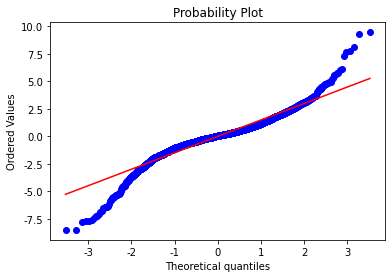

In [11]:
# QQ图：分位数为横坐标,样本值为纵坐标，的散点图
# 用来观察是否符合正态分布
from scipy import stats
df = df.sort_values(by='pct_chg',ascending=False).reset_index(drop=True)
# df['quantile'] = df['pct_chg'].rank(pct=True,ascending=False)
stats.probplot(df['pct_chg'],dist='norm',plot=plt)

In [21]:
import numpy as np
# VaR计算：https://zhuanlan.zhihu.com/p/148560586
# 一个是按照百分比，一个是按照假设是正态根据置信度反推

# 方法1：历史+分位数法
sRate = df['pct_chg'].sort_values(ascending=True)
# 使用百分位(1分位，5分位，10分位)
p = np.percentile(sRate, (1, 5, 10), interpolation='midpoint')
print("1%的日波动率：",p[0])
print("5%的日波动率：",p[1])
print("10%的日波动率：",p[2])

print("*"*30)


# 方法2：
from scipy.stats import norm
u = df['pct_chg'].mean()
σ2 = df['pct_chg'].var()
σ  = df['pct_chg'].std()

# 因为 (R* - u)/σ = Z_01
# 所以 R* = Z_01*σ - u

# 置信度为 99% 时的 VaR
Z_01 = -norm.ppf(0.99)
print("1%的日波动率：",Z_01*σ - u)

# 置信度为 95% 时的 VaR
Z_05 = -norm.ppf(0.95)
print("5%的日波动率：",Z_05*σ - u)

# 置信度为 90% 时的 VaR
Z_10 = -norm.ppf(0.90)
print("10%的日波动率：",Z_10*σ - u)


1%的日波动率： -5.2602
5%的日波动率： -2.4884
10%的日波动率： -1.61915
******************************
1%的日波动率： -3.6113018204034724
5%的日波动率： -2.553524755985104
10%的日波动率： -1.9896277170102352
